# Gradient Descent


In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Linear Algebra with Numpy

In [2]:
a = np.array([1, 3, 2, 4])

In [3]:
a

array([1, 3, 2, 4])

In [4]:
type(a)

numpy.ndarray

In [5]:
A = np.array([[3, 1, 2],
              [2, 3, 4]])

B = np.array([[0, 1],
              [2, 3],
              [4, 5]])

C = np.array([[0, 1],
              [2, 3],
              [4, 5],
              [0, 1],
              [2, 3],
              [4, 5]])

print("A is a {} matrix".format(A.shape))
print("B is a {} matrix".format(B.shape))
print("C is a {} matrix".format(C.shape))

A is a (2, 3) matrix
B is a (3, 2) matrix
C is a (6, 2) matrix


In [6]:
A[0]

array([3, 1, 2])

In [7]:
C[2, 0]

4

In [8]:
B[:, 0]

array([0, 2, 4])

### Elementwise operations

In [9]:
3 * A

array([[ 9,  3,  6],
       [ 6,  9, 12]])

In [10]:
A + A

array([[6, 2, 4],
       [4, 6, 8]])

In [11]:
A * A

array([[ 9,  1,  4],
       [ 4,  9, 16]])

In [12]:
A / A

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [13]:
A - A

array([[0, 0, 0],
       [0, 0, 0]])

In [14]:
A + B

ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 

In [ ]:
A * B

### Dot product

In [15]:
A.shape

(2, 3)

In [16]:
B.shape

(3, 2)

In [17]:
A.dot(B)

array([[10, 16],
       [22, 31]])

In [18]:
np.dot(A, B)

array([[10, 16],
       [22, 31]])

In [19]:
B.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

In [20]:
C.shape

(6, 2)

In [21]:
A.shape

(2, 3)

In [22]:
C.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28],
       [ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

In [23]:
A.dot(C)

ValueError: shapes (2,3) and (6,2) not aligned: 3 (dim 1) != 6 (dim 0)

## Gradient descent

![](../data/banknotes.png)

In [24]:
df = pd.read_csv('../data/banknotes.csv')

In [25]:
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [26]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [27]:
import seaborn as sns

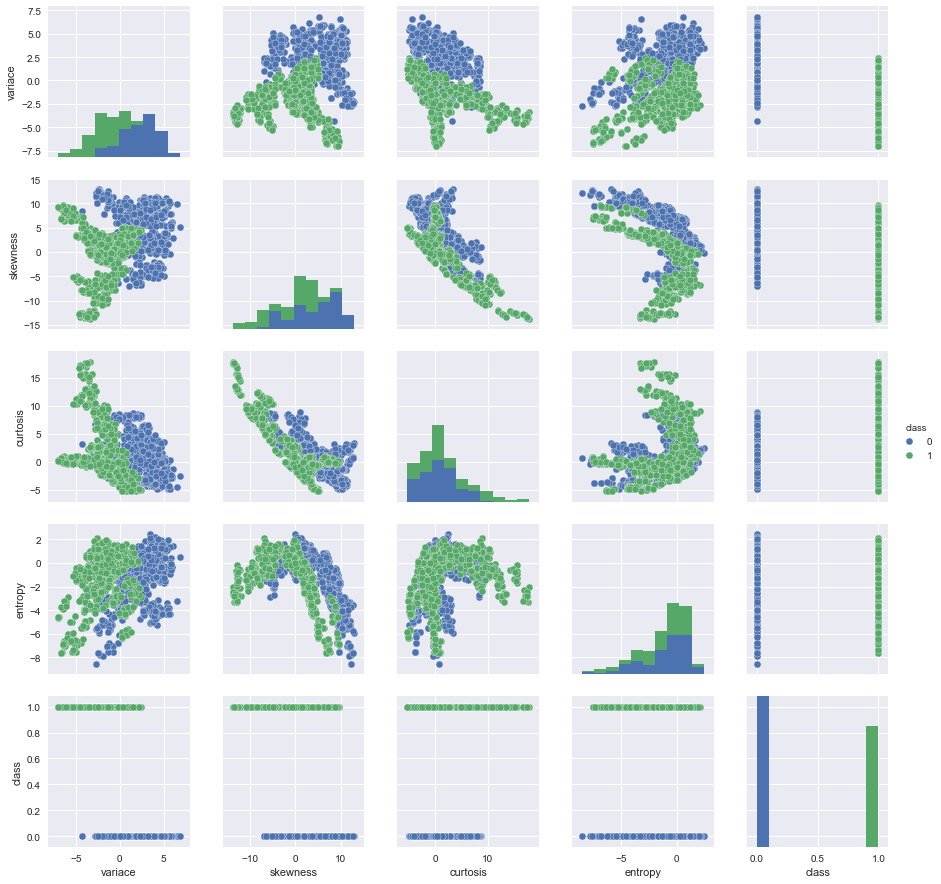

In [28]:
sns.pairplot(df, hue="class")

#### Baseline model

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [30]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [31]:
X

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ..., 
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

In [32]:
model = RandomForestClassifier()
cross_val_score(model, X, y)

array([ 0.99126638,  0.9868709 ,  0.99562363])

### Logistic Regression Model

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [34]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [35]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train)
result = model.evaluate(X_test, y_test)

Epoch 1/10
960/960 [==============================] - 0s - loss: 0.7344 - acc: 0.5719     
Epoch 2/10
960/960 [==============================] - 0s - loss: 0.6733 - acc: 0.6094     
Epoch 3/10
960/960 [==============================] - 0s - loss: 0.6249 - acc: 0.6479     
Epoch 4/10
960/960 [==============================] - 0s - loss: 0.5860 - acc: 0.7031     
Epoch 5/10
960/960 [==============================] - 0s - loss: 0.5544 - acc: 0.7479     
Epoch 6/10
960/960 [==============================] - 0s - loss: 0.5282 - acc: 0.7708     
Epoch 7/10
960/960 [==============================] - 0s - loss: 0.5062 - acc: 0.7823     
Epoch 8/10
960/960 [==============================] - 0s - loss: 0.4874 - acc: 0.7937     
Epoch 9/10
960/960 [==============================] - 0s - loss: 0.4710 - acc: 0.8052     
Epoch 10/10
 32/412 [=>............................] - ETA: 0s

In [36]:
# save the value of history to see how the model is doing along time
historydf = pd.DataFrame(history.history, index=history.epoch)
historydf.head()

,acc,loss
0,0.571875,0.734354
1,0.609375,0.673273
2,0.647917,0.624893
3,0.703125,0.586018
4,0.747917,0.554363


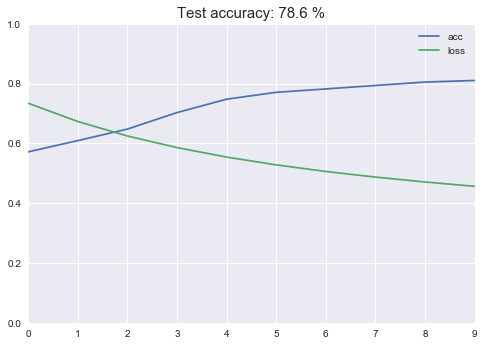

In [37]:
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15)

### Learning Rates

In [38]:
dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(lr=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, verbose=0, epochs=20)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [39]:
historydf = pd.concat(dflist, axis=1)

In [40]:
historydf

,acc,loss,acc,loss,acc,loss,acc,loss
0,0.537500,0.745764,0.591667,0.655423,0.708333,0.578235,0.925000,0.259010
1,0.617708,0.647345,0.857292,0.427669,0.914583,0.304009,0.969792,0.123919
2,0.695833,0.573040,0.902083,0.342776,0.943750,0.234645,0.972917,0.093131
3,0.777083,0.516249,0.920833,0.292529,0.958333,0.195349,0.978125,0.079685
4,0.818750,0.472047,0.930208,0.257572,0.961458,0.169158,0.978125,0.070847
5,0.858333,0.436950,0.943750,0.231152,0.965625,0.150449,0.980208,0.064778
6,0.885417,0.408401,0.948958,0.210382,0.966667,0.136574,0.979167,0.060483
7,0.900000,0.384741,0.955208,0.193698,0.968750,0.125731,0.981250,0.057361
8,0.908333,0.364663,0.958333,0.179891,0.968750,0.117189,0.981250,0.054733
9,0.913542,0.347403,0.959375,0.168305,0.971875,0.110084,0.981250,0.052363


In [41]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

In [42]:
historydf

learning_rate      0.01                0.05                0.10            \
metric              acc      loss       acc      loss       acc      loss   
0              0.537500  0.745764  0.591667  0.655423  0.708333  0.578235   
1              0.617708  0.647345  0.857292  0.427669  0.914583  0.304009   
2              0.695833  0.573040  0.902083  0.342776  0.943750  0.234645   
3              0.777083  0.516249  0.920833  0.292529  0.958333  0.195349   
4              0.818750  0.472047  0.930208  0.257572  0.961458  0.169158   
5              0.858333  0.436950  0.943750  0.231152  0.965625  0.150449   
6              0.885417  0.408401  0.948958  0.210382  0.966667  0.136574   
7              0.900000  0.384741  0.955208  0.193698  0.968750  0.125731   
8              0.908333  0.364663  0.958333  0.179891  0.968750  0.117189   
9              0.913542  0.347403  0.959375  0.168305  0.971875  0.110084   
10             0.919792  0.332351  0.962500  0.158496  0.972917  0.104138   
11             0.925000  0.318984  0.964583  0.150086  0.973958  0.099192   
12             0.927083  0.307077  0.966667  0.142786  0.972917  0.094844   
13             0.928125  0.296324  0.968750  0.136330  0.975000  0.091124   
14             0.929167  0.286544  0.968750  0.130654  0.976042  0.087834   
15             0.932292  0.277606  0.968750  0.125606  0.975000  0.084938   
16             0.934375  0.269388  0.968750  0.121106  0.976042  0.082370   
17             0.938542  0.261801  0.968750  0.117042  0.977083  0.079977   
18             0.942708  0.254739  0.970833  0.113350  0.977083  0.077865   
19             0.944792  0.248159  0.970833  0.109988  0.979167  0.075929   

learning_rate      0.50            
metric              acc      loss  
0              0.925000  0.259010  
1              0.969792  0.123919  
2              0.972917  0.093131  
3              0.978125  0.079685  
4              0.978125  0.070847  
5              0.980208  0.064778  
6              0.979167  0.060483  
7              0.981250  0.057361  
8              0.981250  0.054733  
9              0.981250  0.052363  
10             0.981250  0.050469  
11             0.981250  0.048725  
12             0.981250  0.047678  
13             0.981250  0.046471  
14             0.981250  0.045277  
15             0.982292  0.044382  
16             0.982292  0.043423  
17             0.981250  0.042540  
18             0.982292  0.041913  
19             0.984375  0.041284

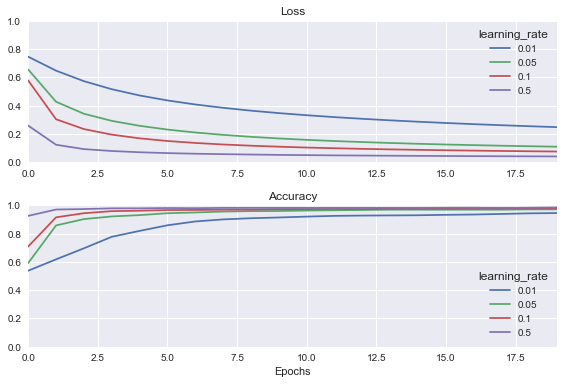

In [43]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

### Batch Sizes

In [44]:
dflist = []

batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=batch_size, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [45]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names=['batch_size', 'metric'])
historydf.columns = idx

In [46]:
historydf

batch_size       16                  32                  64             \
metric           acc      loss       acc      loss       acc      loss   
0           0.463542  0.723846  0.358333  1.383861  0.812500  0.422714   
1           0.654167  0.622937  0.377083  1.202766  0.817708  0.417085   
2           0.748958  0.553733  0.411458  1.041534  0.820833  0.411701   
3           0.812500  0.503436  0.455208  0.902690  0.822917  0.406534   
4           0.850000  0.464935  0.486458  0.787740  0.827083  0.401540   
5           0.875000  0.434283  0.566667  0.695869  0.830208  0.396760   
6           0.889583  0.409021  0.661458  0.624590  0.834375  0.392152   
7           0.894792  0.387723  0.795833  0.569784  0.841667  0.387697   
8           0.897917  0.369398  0.901042  0.527538  0.844792  0.383408   
9           0.904167  0.353313  0.930208  0.494503  0.850000  0.379260   

batch_size       128            
metric           acc      loss  
0           0.282292  1.274591  
1           0.294792  1.244494  
2           0.302083  1.215038  
3           0.311458  1.186693  
4           0.322917  1.159150  
5           0.334375  1.132473  
6           0.348958  1.106279  
7           0.361458  1.080876  
8           0.371875  1.056285  
9           0.380208  1.032518

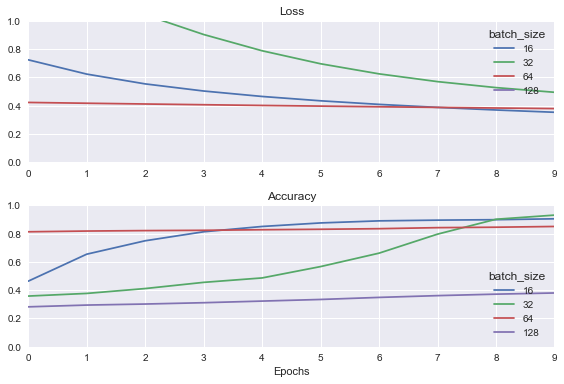

In [47]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()
# small batch sizes converge faster!, too small may be too noisy! default is 32

## Optimizers

In [48]:
from keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [49]:
dflist = []

optimizers = ['SGD(lr=0.01)',
              'SGD(lr=0.01, momentum=0.3)',
              'SGD(lr=0.01, momentum=0.3, nesterov=True)',  
              'Adam(lr=0.01)',
              'Adagrad(lr=0.01)',
              'RMSprop(lr=0.01)']

for opt_name in optimizers:

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [50]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx

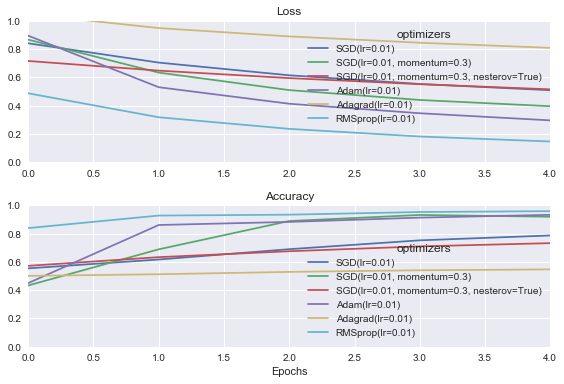

In [51]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Initialization

https://keras.io/initializers/

Initialization is crutial. We can see that changing initialization can also change the results 
drastically, you can get into local minima by bad luck alone

In [52]:
dflist = []

initializers = ['zeros', 
                'uniform', 
                'normal',
                'he_normal', # normal based on input units
                'lecun_uniform'] # rescale in other ways than zero and one

for init in initializers:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,),
                    kernel_initializer=init,
                    activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [53]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                 names=['initializers', 'metric'])

historydf.columns = idx

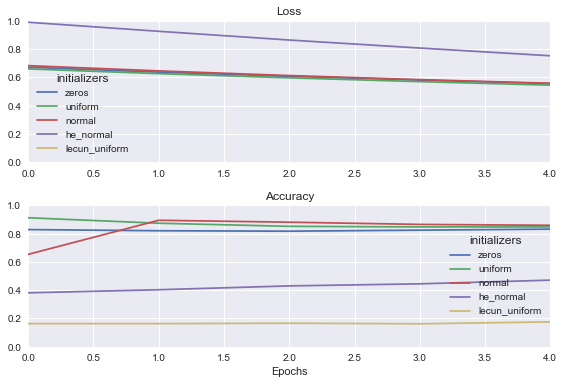

In [54]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Inner layer representation
Visualize activation, to understand what model is doing, and to potentially reduce the dimensionality. if layers are not doing anything...

In [55]:
K.clear_session()

model = Sequential()
model.add(Dense(2, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

h = model.fit(X_train, y_train, batch_size=16, epochs=20,
              verbose=1, validation_split=0.3)
result = model.evaluate(X_test, y_test)

Train on 672 samples, validate on 288 samples
Epoch 1/20
672/672 [==============================] - 0s - loss: 0.5685 - acc: 0.6994 - val_loss: 0.5382 - val_acc: 0.7222
Epoch 2/20
672/672 [==============================] - 0s - loss: 0.4301 - acc: 0.7961 - val_loss: 0.4165 - val_acc: 0.8194
Epoch 3/20
672/672 [==============================] - 0s - loss: 0.3219 - acc: 0.8690 - val_loss: 0.3112 - val_acc: 0.8889
Epoch 4/20
672/672 [==============================] - 0s - loss: 0.2462 - acc: 0.9048 - val_loss: 0.2406 - val_acc: 0.8958
Epoch 5/20
672/672 [==============================] - 0s - loss: 0.1912 - acc: 0.9271 - val_loss: 0.1757 - val_acc: 0.9201
Epoch 6/20
672/672 [==============================] - 0s - loss: 0.1381 - acc: 0.9568 - val_loss: 0.1113 - val_acc: 0.9757
Epoch 7/20
672/672 [==============================] - 0s - loss: 0.0994 - acc: 0.9688 - val_loss: 0.0744 - val_acc: 0.9826
Epoch 8/20
672/672 [==============================] - 0s - loss: 0.0732 - acc: 0.9717 - val_l

In [56]:
result

[0.028939275473392416, 0.98786407766990292]

In [61]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.layers

In [63]:
# 
inp = model.layers[0].input
out = model.layers[0].output

In [64]:
inp

<tf.Tensor 'dense_1_input:0' shape=(?, 4) dtype=float32>

In [65]:
out

<tf.Tensor 'dense_1/Relu:0' shape=(?, 2) dtype=float32>

In [66]:
# K is backend
features_function = K.function([inp], [out])

In [68]:
# this is the function that this layer applies to the data
features_function

In [81]:
features_function([X_test])[0].shape

(412, 2)

In [82]:
# apply the feature function to the data
features = features_function([X_test])[0]

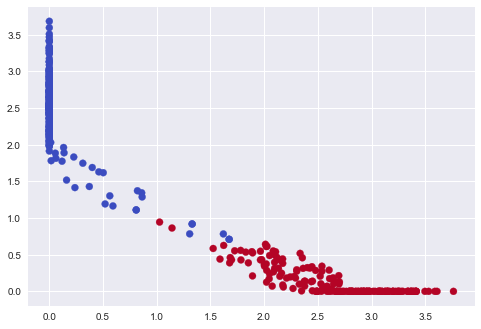

In [84]:
# clearly the feature function is creating a good way to separate the data
plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')

In [86]:
K.clear_session()

model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

 32/412 [=>............................] - ETA: 0s

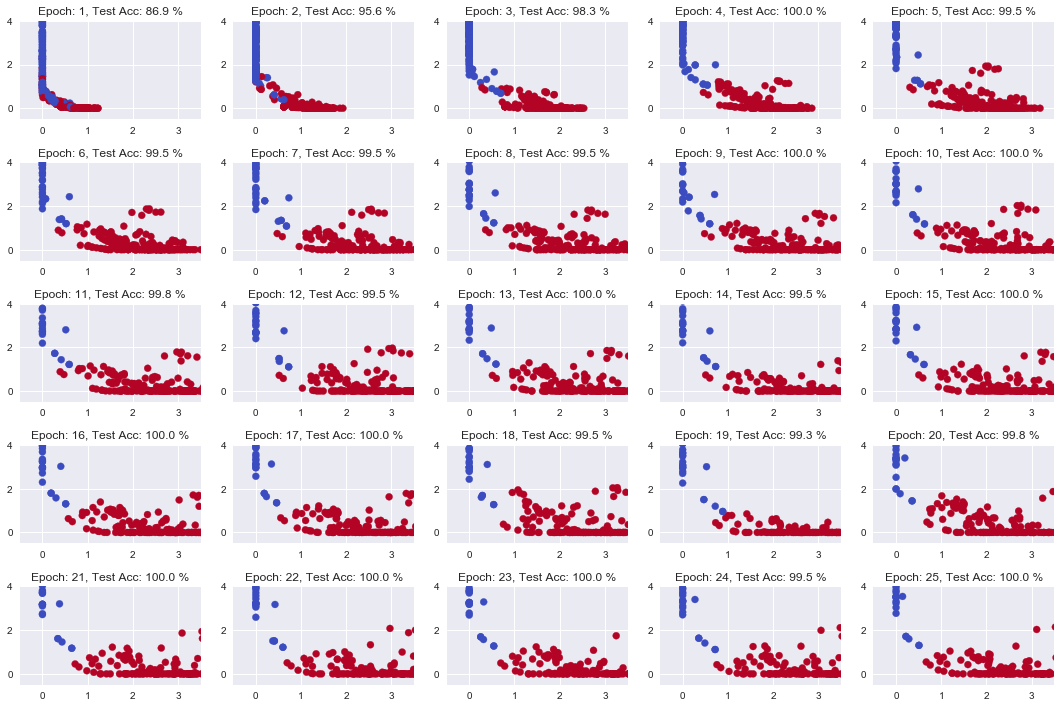

In [87]:
inp = model.layers[0].input
out = model.layers[1].output
features_function = K.function([inp], [out])

plt.figure(figsize=(15,10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))

plt.tight_layout()

# over time the network is able to learn how to best separate the data
# if we change the initialization, the graph will look differently

### Exercise 1

You've just been hired at a wine company and they would like you to help them build a model that predicts the quality of their wine based on several measurements. They give you a dataset with wine

- Load the ../data/wines.csv into Pandas
- Use the column called "Class" as target
- Check how many classes are there in target, and if necessary use dummy columns for a multi-class classification
- Use all the other columns as features, check their range and distribution (using seaborn pairplot)
- Rescale all the features using either MinMaxScaler or StandardScaler
- Build a deep model with at least 1 hidden layer to classify the data
- Choose the cost function, what will you use? Mean Squared Error? Binary Cross-Entropy? Categorical Cross-Entropy?
- Choose an optimizer
- Choose a value for the learning rate, you may want to try with several values
- Choose a batch size
- Train your model on all the data using a `validation_split=0.2`. Can you converge to 100% validation accuracy?
- What's the minumum number of epochs to converge?
- Repeat the training several times to verify how stable your results are

In [100]:
from sklearn.preprocessing import MinMaxScaler

In [106]:
df = pd.read_csv('../data/wines.csv')
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [107]:
y = pd.get_dummies(df['Class'], prefix='Class').values
y.shape

(178, 3)

In [108]:
mm = MinMaxScaler()
X = df.drop(['Class'], axis=1)
X.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [109]:
X = mm.fit_transform(X)
X.shape

(178, 13)

In [129]:
init = 'glorot_uniform'
model = Sequential()
model.add(Dense(3, input_dim=13, activation='sigmoid', kernel_initializer=init))
model.compile(Adam(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 3)                 42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [135]:
model.fit(X, y, epochs=30, verbose=0, validation_split=0.2)

In [136]:
model.layers

In [137]:
inp = model.layers[0].input
out = model.layers[0].output
inp, out

(<tf.Tensor 'dense_17_input:0' shape=(?, 13) dtype=float32>,
 <tf.Tensor 'dense_17/Sigmoid:0' shape=(?, 3) dtype=float32>)

In [138]:
features_function = K.function([inp], [out])
features_function

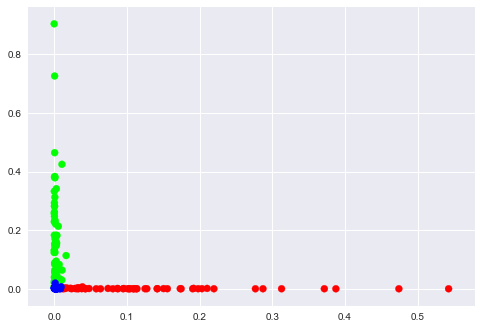

In [139]:
features = features_function([X])[0]
plt.scatter(features[:, 0], features[:, 1], c = y, cmap='coolwarm')

### Exercise 2

Since this dataset has 13 features we can only visualize pairs of features like we did in the Paired plot. We could however exploit the fact that a neural network is a function to extract 2 high level features to represent our data.

- Build a deep fully connected network with the following structure:
    - Layer 1: 8 nodes
    - Layer 2: 5 nodes
    - Layer 3: 2 nodes
    - Output : 3 nodes
- Choose activation functions, inizializations, optimizer and learning rate so that it converges to 100% accuracy within 20 epochs (not easy)
- Remember to train the model on the scaled data
- Define a Feature Funtion like we did above between the input of the 1st layer and the output of the 3rd layer
- Calculate the features and plot them on a 2-dimensional scatter plot
- Can we distinguish the 3 classes well?


### Exercise 3

Keras functional API. So far we've always used the Sequential model API in Keras. However, Keras also offers a Functional API, which is much more powerful. You can find its [documentation here](https://keras.io/getting-started/functional-api-guide/). Let's see how we can leverage it.

- define an input layer called `inputs`
- define two hidden layers as before, one with 8 nodes, one with 5 nodes
- define a `second_to_last` layer with 2 nodes
- define an output layer with 3 nodes
- create a model that connect input and output
- train it and make sure that it converges
- define a function between inputs and second_to_last layer
- recalculate the features and plot them

### Exercise 4 

Keras offers the possibility to call a function at each epoch. These are Callbacks, and their [documentation is here](https://keras.io/callbacks/). Callbacks allow us to add some neat functionality. In this exercise we'll explore a few of them.

- Split the data into train and test sets with a test_size = 0.3 and random_state=42
- Reset and recompile your model
- train the model on the train data using `validation_data=(X_test, y_test)`
- Use the `EarlyStopping` callback to stop your training if the `val_loss` doesn't improve
- Use the `ModelCheckpoint` callback to save the trained model to disk once training is finished
- Use the `TensorBoard` callback to output your training information to a `/tmp/` subdirectory
- Watch the next video for an overview of tensorboard